# ROI Prediction

Load regions of interests extracted from the 19 beer data and try to predict whether they are peaks or not peaks.

In [1]:
import sys
sys.path.append('../codes')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import pylab as plt
import os

from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *
from VMSfunctions.Chromatograms import *

In [5]:
set_log_level_debug()

In [6]:
base_dir = 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\'

### Load ROI data for the 19 beers that we created before in `roi_extraction.ipynb`

In [7]:
extracted_roi_file = os.path.join(base_dir, 'Trained Models\\rois_19_beers.p')
ds = DataSource()
ds.load_roi(extracted_roi_file)

`ds.all_rois` is a dictionary. 
- The key is the filename.
- The value is a list of `RegionOfInterest` objects

In [8]:
len(ds.all_rois)

19

In [9]:
print('\n'.join(ds.all_rois.keys()))

Beer_multibeers_1_fullscan1.mzML
Beer_multibeers_10_fullscan1.mzML
Beer_multibeers_11_fullscan1.mzML
Beer_multibeers_12_fullscan1.mzML
Beer_multibeers_13_fullscan1.mzML
Beer_multibeers_14_fullscan1.mzML
Beer_multibeers_15_fullscan1.mzML
Beer_multibeers_16_fullscan1.mzML
Beer_multibeers_17_fullscan1.mzML
Beer_multibeers_18_fullscan1.mzML
Beer_multibeers_19_fullscan1.mzML
Beer_multibeers_2_fullscan1.mzML
Beer_multibeers_3_fullscan1.mzML
Beer_multibeers_4_fullscan1.mzML
Beer_multibeers_5_fullscan1.mzML
Beer_multibeers_6_fullscan1.mzML
Beer_multibeers_7_fullscan1.mzML
Beer_multibeers_8_fullscan1.mzML
Beer_multibeers_9_fullscan1.mzML


Get the first 20 ROIs for beer1pos.

An ROI object has the following attributes  (defined in `DataGenerator.py`)
```
        self.file_name = file_name
        self.mode = mode
        self.pickedPeak = pickedPeak
        self.mzrange = mzrange
        self.rtrange = rtrange
        self.scrange = scrange
        self.peaks = []
```

In [10]:
def get_rois_for(ds, filename):
    return ds.all_rois[filename]['rois']

In [11]:
key = 'Beer_multibeers_1_fullscan1.mzML'
values = get_rois_for(ds, key)

In [12]:
print(key)
print(values[0:20])

Beer_multibeers_1_fullscan1.mzML
[ROI Beer_multibeers_1_fullscan1.mzML Positive picked False mz (133.0971-133.0972) rt (0.1164-4.3195) scans (1-4)
 ROI Beer_multibeers_1_fullscan1.mzML Positive picked False mz (147.0916-147.0918) rt (0.1164-4.3195) scans (1-4)
 ROI Beer_multibeers_1_fullscan1.mzML Positive picked False mz (147.1240-147.1242) rt (0.1164-4.3195) scans (1-4)
 ROI Beer_multibeers_1_fullscan1.mzML Positive picked False mz (152.1574-152.1583) rt (0.1164-4.3195) scans (1-4)
 ROI Beer_multibeers_1_fullscan1.mzML Positive picked False mz (154.1226-154.1230) rt (0.1164-4.3195) scans (1-4)
 ROI Beer_multibeers_1_fullscan1.mzML Positive picked False mz (156.1131-156.1134) rt (0.1164-4.3195) scans (1-4)
 ROI Beer_multibeers_1_fullscan1.mzML Positive picked False mz (160.0869-160.0872) rt (0.1164-4.3195) scans (1-4)
 ROI Beer_multibeers_1_fullscan1.mzML Positive picked False mz (173.1036-173.1039) rt (0.1164-4.3195) scans (1-4)
 ROI Beer_multibeers_1_fullscan1.mzML Positive picked F

Filter ROI into positives and negatives set (based on the `x.pickedPeak` attribute). Additionally we also filter the ROI list to have at least 3 data points (`len(x.peaks) > 2`).

In [13]:
positives = list(filter(lambda x: x.pickedPeak and len(x.peaks) > 2, values))
negatives = list(filter(lambda x: not x.pickedPeak and len(x.peaks) > 2, values))

Make some plots of positive and negative instances.

In [14]:
def plot_roi(roi):
    X = [p.rt for p in roi.peaks]
    Y = [p.intensity for p in roi.peaks]
    plt.plot(X, Y)
    title = 'ROI mz (%.4f-%.4f) pickedPeak %s' % (roi.mzrange[0], roi.mzrange[1], roi.pickedPeak)
    plt.title(title)
    plt.xlabel('RT')
    plt.ylabel('intensity')
    plt.show()
    print('\n'.join(map(str, roi.peaks)))

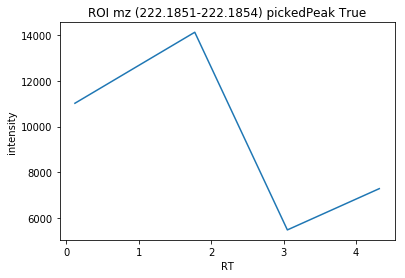

Peak mz=222.1854 rt=0.12 intensity=11017.92 ms_level=1
Peak mz=222.1853 rt=1.77 intensity=14122.94 ms_level=1
Peak mz=222.1851 rt=3.05 intensity=5480.02 ms_level=1
Peak mz=222.1853 rt=4.32 intensity=7284.58 ms_level=1


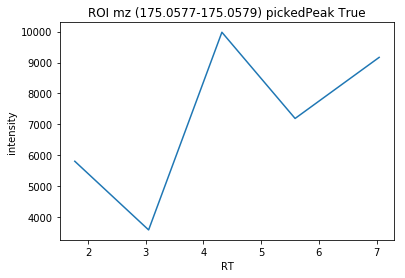

Peak mz=175.0578 rt=1.77 intensity=5808.57 ms_level=1
Peak mz=175.0577 rt=3.05 intensity=3589.02 ms_level=1
Peak mz=175.0577 rt=4.32 intensity=9979.51 ms_level=1
Peak mz=175.0579 rt=5.59 intensity=7192.24 ms_level=1
Peak mz=175.0577 rt=7.04 intensity=9167.11 ms_level=1


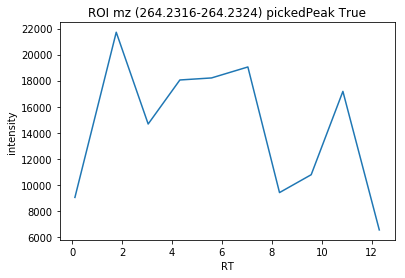

Peak mz=264.2324 rt=0.12 intensity=9036.85 ms_level=1
Peak mz=264.2321 rt=1.77 intensity=21712.95 ms_level=1
Peak mz=264.2323 rt=3.05 intensity=14671.26 ms_level=1
Peak mz=264.2323 rt=4.32 intensity=18049.53 ms_level=1
Peak mz=264.2321 rt=5.59 intensity=18205.99 ms_level=1
Peak mz=264.2317 rt=7.04 intensity=19047.96 ms_level=1
Peak mz=264.2320 rt=8.31 intensity=9409.11 ms_level=1
Peak mz=264.2320 rt=9.58 intensity=10779.32 ms_level=1
Peak mz=264.2323 rt=10.85 intensity=17174.47 ms_level=1
Peak mz=264.2316 rt=12.31 intensity=6543.28 ms_level=1


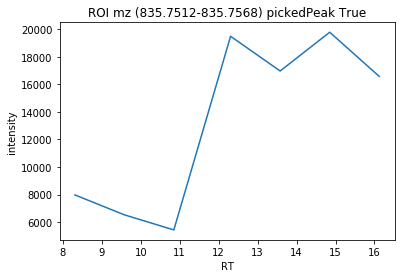

Peak mz=835.7546 rt=8.31 intensity=7971.95 ms_level=1
Peak mz=835.7544 rt=9.58 intensity=6528.23 ms_level=1
Peak mz=835.7512 rt=10.85 intensity=5434.36 ms_level=1
Peak mz=835.7568 rt=12.31 intensity=19478.14 ms_level=1
Peak mz=835.7542 rt=13.58 intensity=16961.71 ms_level=1
Peak mz=835.7556 rt=14.85 intensity=19771.41 ms_level=1
Peak mz=835.7563 rt=16.12 intensity=16566.30 ms_level=1


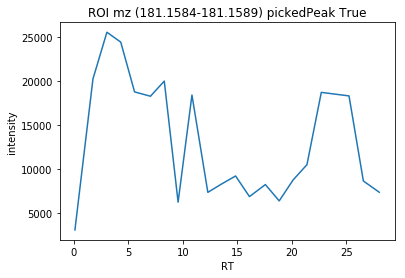

Peak mz=181.1589 rt=0.12 intensity=3031.87 ms_level=1
Peak mz=181.1587 rt=1.77 intensity=20263.39 ms_level=1
Peak mz=181.1588 rt=3.05 intensity=25586.94 ms_level=1
Peak mz=181.1587 rt=4.32 intensity=24460.39 ms_level=1
Peak mz=181.1588 rt=5.59 intensity=18779.70 ms_level=1
Peak mz=181.1586 rt=7.04 intensity=18285.35 ms_level=1
Peak mz=181.1587 rt=8.31 intensity=20011.08 ms_level=1
Peak mz=181.1585 rt=9.58 intensity=6200.94 ms_level=1
Peak mz=181.1588 rt=10.85 intensity=18419.33 ms_level=1
Peak mz=181.1589 rt=12.31 intensity=7318.87 ms_level=1
Peak mz=181.1586 rt=13.58 intensity=8280.78 ms_level=1
Peak mz=181.1587 rt=14.85 intensity=9185.75 ms_level=1
Peak mz=181.1586 rt=16.12 intensity=6833.61 ms_level=1
Peak mz=181.1588 rt=17.58 intensity=8205.84 ms_level=1
Peak mz=181.1588 rt=18.85 intensity=6344.94 ms_level=1
Peak mz=181.1586 rt=20.12 intensity=8726.88 ms_level=1
Peak mz=181.1586 rt=21.40 intensity=10476.69 ms_level=1
Peak mz=181.1587 rt=22.71 intensity=18725.52 ms_level=1
Peak mz=1

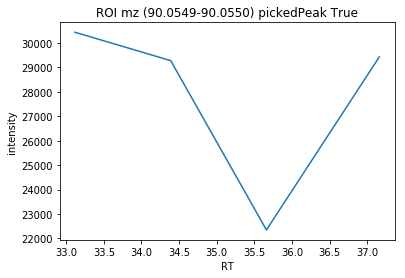

Peak mz=90.0549 rt=33.12 intensity=30443.31 ms_level=1
Peak mz=90.0550 rt=34.39 intensity=29281.69 ms_level=1
Peak mz=90.0550 rt=35.66 intensity=22347.89 ms_level=1
Peak mz=90.0549 rt=37.16 intensity=29432.84 ms_level=1


In [15]:
for i in range(0, 51, 10):
    plot_roi(positives[i])

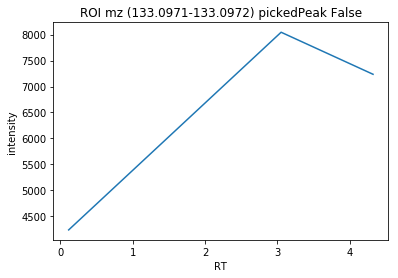

Peak mz=133.0972 rt=0.12 intensity=4238.90 ms_level=1
Peak mz=133.0972 rt=3.05 intensity=8044.71 ms_level=1
Peak mz=133.0972 rt=4.32 intensity=7235.34 ms_level=1


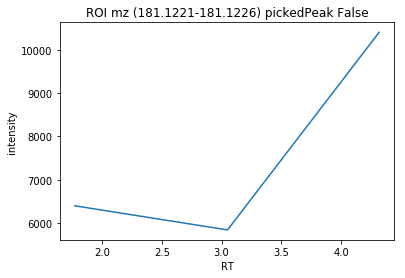

Peak mz=181.1221 rt=1.77 intensity=6395.87 ms_level=1
Peak mz=181.1223 rt=3.05 intensity=5838.96 ms_level=1
Peak mz=181.1224 rt=4.32 intensity=10405.90 ms_level=1


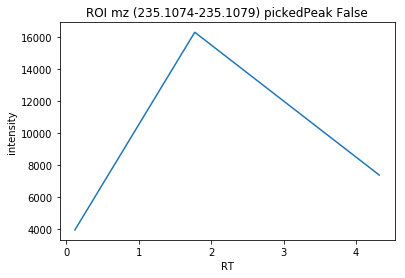

Peak mz=235.1078 rt=0.12 intensity=3929.13 ms_level=1
Peak mz=235.1074 rt=1.77 intensity=16318.27 ms_level=1
Peak mz=235.1075 rt=4.32 intensity=7365.36 ms_level=1


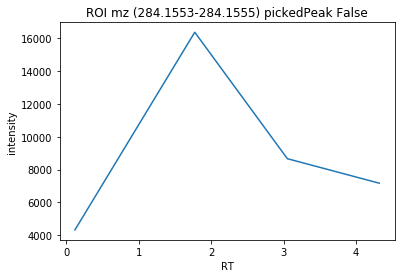

Peak mz=284.1554 rt=0.12 intensity=4314.70 ms_level=1
Peak mz=284.1553 rt=1.77 intensity=16373.79 ms_level=1
Peak mz=284.1553 rt=3.05 intensity=8659.23 ms_level=1
Peak mz=284.1555 rt=4.32 intensity=7164.44 ms_level=1


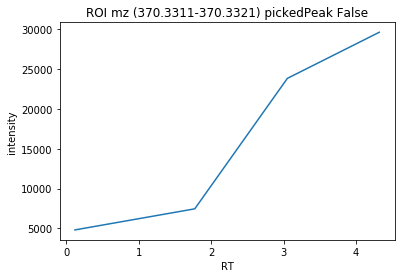

Peak mz=370.3312 rt=0.12 intensity=4820.56 ms_level=1
Peak mz=370.3315 rt=1.77 intensity=7467.40 ms_level=1
Peak mz=370.3311 rt=3.05 intensity=23845.03 ms_level=1
Peak mz=370.3321 rt=4.32 intensity=29635.96 ms_level=1


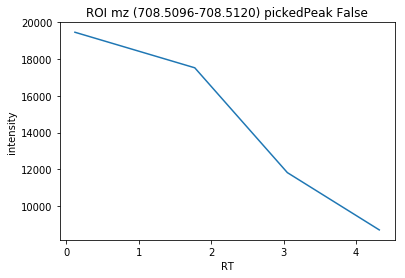

Peak mz=708.5120 rt=0.12 intensity=19447.70 ms_level=1
Peak mz=708.5096 rt=1.77 intensity=17516.99 ms_level=1
Peak mz=708.5117 rt=3.05 intensity=11823.70 ms_level=1
Peak mz=708.5109 rt=4.32 intensity=8711.72 ms_level=1


In [16]:
for i in range(0, 51, 10):
    plot_roi(negatives[i])

### Prediction